In [1]:
import pandas as pd
from mainnet_launch.constants import (
    eth_client,
)
from mainnet_launch.destinations import get_destination_details
from mainnet_launch.lens_contract import get_pools_and_destinations_call
from mainnet_launch.destination_diagnostics.fetch_destination_summary_stats import _build_summary_stats_call

import warnings

destination_details = get_destination_details()

2024-10-29 12:35:12.779 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-10-29 12:35:12.784 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-10-29 12:35:12.785 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-10-29 12:35:12.866 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-10-29 12:35:12.867 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 12:35:13.031 
  command:

    streamlit run /home/parker/Documents/Tokemak/v2-rebalance-dashboard/.venv/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-10-29 12:35:13.031 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-2

In [13]:
d = destination_details[0]
d

Destination Details:
 vaultAddress	: 0x2F7e096a400ded5D02762120b39A3aA4ABA072a4
 exchangeName	: balancer
 dexPool	: 0x7761b6E0Daa04E70637D81f1Da7d186C205C2aDE
 lpTokenAddress	: 0x7761b6E0Daa04E70637D81f1Da7d186C205C2aDE
 lpTokenSymbol	: rsETH / ETHx
 lpTokenName	: Balancer rsETH / ETHx
 autopool	: {'name': 'balETH', 'autopool_eth_addr': '0x6dC3ce9C57b20131347FDc9089D740DAf6eB34c5', 'autopool_eth_strategy_addr': '0xabe104560D0B390309bcF20b73Dca335457AA32e', 'solver_rebalance_plans_bucket': 'v2-gen3-eth-mainnet-solve-v2gen3ethmainnetsolverba-wx1snhldrupb'}
 vault_name	: rsETH / ETHx (balancer)

In [16]:
eth_client.sha3(eth_client.eth.getCode(d.dexPool))

HexBytes('0x887d20cb14f38cbc3082ed25a9bf17d7b15f76eb258787cd98a1b413b8af1772')

In [18]:
byte_code_hash = [
    eth_client.sha3(eth_client.eth.getCode(d.dexPool)) for d in destination_details if d.dexPool is not None
]
byte_code_hash

[HexBytes('0x887d20cb14f38cbc3082ed25a9bf17d7b15f76eb258787cd98a1b413b8af1772'),
 HexBytes('0x887d20cb14f38cbc3082ed25a9bf17d7b15f76eb258787cd98a1b413b8af1772'),
 HexBytes('0x024aa9d4f03e1731ffa27742939097131198f18918be417a07dd074a25a4c34a'),
 HexBytes('0x024aa9d4f03e1731ffa27742939097131198f18918be417a07dd074a25a4c34a'),
 HexBytes('0x234a2b7c6970a34d72404c96ba5047833c5656db81eefaedc35b340fabfcdd36'),
 HexBytes('0x72b6e1b187e715820b74d4243533145e6d2d0e168101fd8b27be6f5be80ca441'),
 HexBytes('0x72b6e1b187e715820b74d4243533145e6d2d0e168101fd8b27be6f5be80ca441'),
 HexBytes('0xa14a09735f718bb80af2cf21a43db5a609278dc9774af6a00a338a5a0a3b093e'),
 HexBytes('0xf9b0b2342e2132b069f65bb801081a730df7cf80b2ef5a8b9a3fc7a6324724f3'),
 HexBytes('0x31094a1911f351cb10c71a89feb861fcf8bae1f3cc23efc7b6f94b1b2c87d40a'),
 HexBytes('0x31094a1911f351cb10c71a89feb861fcf8bae1f3cc23efc7b6f94b1b2c87d40a'),
 HexBytes('0xa14a09735f718bb80af2cf21a43db5a609278dc9774af6a00a338a5a0a3b093e'),
 HexBytes('0x4105952566b4fbf

In [28]:
import hashlib


def sha256_of_bytecode(bytecode: bytes) -> str:
    """
    Computes the SHA-256 hash of given bytecode.

    Parameters:
    bytecode (bytes): The bytecode to hash.

    Returns:
    str: The SHA-256 hash of the bytecode in hexadecimal format.
    """
    sha256_hash = hashlib.sha256()
    sha256_hash.update(bytecode)
    return sha256_hash.hexdigest()


# Example usage
# bytecode = b'your_bytecode_here'  # Replace with actual bytecode
# print(sha256_of_bytecode(bytecode))


dex_pool_to_hash = {}
for d in destination_details:
    if d.dexPool is not None:
        byte_code = eth_client.eth.getCode(d.dexPool)
        dex_pool_to_hash[d.vault_name] = [sha256_of_bytecode(byte_code), d.dexPool]
dex_pool_to_hash

In [29]:
dex_pool_to_hash

{'rsETH / ETHx (balancer)': ['e28f266b3f0fd6dcab5a75980657f5d861e0ee600f4fbf5305abc1d363dfefc3',
  '0x7761b6E0Daa04E70637D81f1Da7d186C205C2aDE'],
 'ezETH-WETH-BPT (balancer)': ['648d944aebe35c2fe7598306e8d5cb5c85e913c84909687e471cd820388d0ae1',
  '0x596192bB6e41802428Ac943D2f1476C1Af25CC0E'],
 'osETH-rETH (curve)': ['a5fea647d19f93d16957eb033b092c873180014d2688387d1413c40a18223db6',
  '0xe080027Bd47353b5D1639772b4a75E9Ed3658A0d'],
 'osETH/wETH-BPT (balancer)': ['912957744b04bd672482c0b587386456567e60b015f8ac0da4394388a45773bf',
  '0xDACf5Fa19b1f720111609043ac67A9818262850c'],
 'pxsteth (curve)': ['006b8d6b76f4b328c7b86e2a83b839380d4fa930ef38e443296840f50f6cb5d9',
  '0x6951bDC4734b9f7F3E1B74afeBC670c736A0EDB6'],
 'weeth-ng (curve)': ['6b0495e455f091188a799301f063bf6fc2fb24bc89ddf6093930c6009c6217be',
  '0xDB74dfDD3BB46bE8Ce6C33dC9D82777BCFc3dEd5'],
 'ECLP-wstETH-cbETH (balancer)': ['06eb8c966f420eea2d03b2e4d6f354f25b7f38d28c1b325682ab868ec494abcc',
  '0xF7A826D47c8E02835D94fb0Aa40F0cC95

In [21]:
dex_pool_to_

Destination Details:
 vaultAddress	: 0x87F46aa699840705F587761d9cfF290fCe1F84aE
 exchangeName	: curve
 dexPool	: 0x9c3B46C0Ceb5B9e304FCd6D88Fc50f7DD24B31Bc
 lpTokenAddress	: 0x9c3B46C0Ceb5B9e304FCd6D88Fc50f7DD24B31Bc
 lpTokenSymbol	: frxeth-ng-f
 lpTokenName	: Curve.fi Factory Plain Pool: frxETH/WETH
 autopool	: {'name': 'autoETH', 'autopool_eth_addr': '0x0A2b94F6871c1D7A32Fe58E1ab5e6deA2f114E56', 'autopool_eth_strategy_addr': '0xf5f6addB08c5e6091e5FdEc7326B21bEEd942235', 'solver_rebalance_plans_bucket': 'v2-gen3-eth-mainnet-solve-v2gen3ethmainnetsolverau-7ju0ra8aoznh'}
 vault_name	: frxeth-ng-f (curve)

In [ ]:
# https://balancer.fi/pools/ethereum/v2/0xb91159aa527d4769cb9faf3e4adb760c7e8c8ea700000000000000000000067c
from multicall import Call

from mainnet_launch.constants import CACHE_TIME, ALL_AUTOPOOLS, eth_client, LENS_CONTRACT
from mainnet_launch.data_fetching.get_state_by_block import (
    get_raw_state_by_blocks,
    get_state_by_one_block,
    identity_with_bool_success,
    safe_normalize_with_bool_success,
    build_blocks_to_use,
)

In [ ]:
# '0xe080027Bd47353b5D1639772b4a75E9Ed3658A0d' osETH/rETH is CurveStableSwapNG

In [ ]:
def build_get_virtual_price_call(name: str, curve_pool) -> Call:
    return Call(
        curve_pool,
        ["get_virtual_price()(uint256)"],
        [(name, safe_normalize_with_bool_success)],
    )

In [10]:
destination_details

[Destination Details:
  vaultAddress	: 0x2F7e096a400ded5D02762120b39A3aA4ABA072a4
  exchangeName	: balancer
  dexPool	: 0x7761b6E0Daa04E70637D81f1Da7d186C205C2aDE
  lpTokenAddress	: 0x7761b6E0Daa04E70637D81f1Da7d186C205C2aDE
  lpTokenSymbol	: rsETH / ETHx
  lpTokenName	: Balancer rsETH / ETHx
  autopool	: {'name': 'balETH', 'autopool_eth_addr': '0x6dC3ce9C57b20131347FDc9089D740DAf6eB34c5', 'autopool_eth_strategy_addr': '0xabe104560D0B390309bcF20b73Dca335457AA32e', 'solver_rebalance_plans_bucket': 'v2-gen3-eth-mainnet-solve-v2gen3ethmainnetsolverba-wx1snhldrupb'}
  vault_name	: rsETH / ETHx (balancer),
 Destination Details:
  vaultAddress	: 0x2F7e096a400ded5D02762120b39A3aA4ABA072a4
  exchangeName	: balancer
  dexPool	: 0x7761b6E0Daa04E70637D81f1Da7d186C205C2aDE
  lpTokenAddress	: 0x7761b6E0Daa04E70637D81f1Da7d186C205C2aDE
  lpTokenSymbol	: rsETH / ETHx
  lpTokenName	: Balancer rsETH / ETHx
  autopool	: {'name': 'autoLRT', 'autopool_eth_addr': '0xE800e3760FC20aA98c5df6A9816147f190455AF3

In [ ]:
def get_stored_rates(name, pool):
    return ChildProcessError

In [11]:
[d for d in destination_details if "curve" in d.vault_name]

[Destination Details:
  vaultAddress	: 0x49895f72fd9d0BF6BBb485C70CE38556de62b070
  exchangeName	: curve
  dexPool	: 0xe080027Bd47353b5D1639772b4a75E9Ed3658A0d
  lpTokenAddress	: 0xe080027Bd47353b5D1639772b4a75E9Ed3658A0d
  lpTokenSymbol	: osETH-rETH
  lpTokenName	: osETH/rETH
  autopool	: {'name': 'autoETH', 'autopool_eth_addr': '0x0A2b94F6871c1D7A32Fe58E1ab5e6deA2f114E56', 'autopool_eth_strategy_addr': '0xf5f6addB08c5e6091e5FdEc7326B21bEEd942235', 'solver_rebalance_plans_bucket': 'v2-gen3-eth-mainnet-solve-v2gen3ethmainnetsolverau-7ju0ra8aoznh'}
  vault_name	: osETH-rETH (curve),
 Destination Details:
  vaultAddress	: 0xd96E943098B2AE81155e98D7DC8BeaB34C539f01
  exchangeName	: curve
  dexPool	: 0x6951bDC4734b9f7F3E1B74afeBC670c736A0EDB6
  lpTokenAddress	: 0x6951bDC4734b9f7F3E1B74afeBC670c736A0EDB6
  lpTokenSymbol	: pxsteth
  lpTokenName	: pxETH/stETH
  autopool	: {'name': 'autoETH', 'autopool_eth_addr': '0x0A2b94F6871c1D7A32Fe58E1ab5e6deA2f114E56', 'autopool_eth_strategy_addr': '0xf5

In [ ]:
base apr from LST staking yield is folded into the virtual price change for all curve pools
This is is false because this Curve pool (0x5FAE7E604FC3e24fd43A72867ceBaC94c65b404A)

In [5]:
destination_details

[Destination Details:
  vaultAddress	: 0x2F7e096a400ded5D02762120b39A3aA4ABA072a4
  exchangeName	: balancer
  dexPool	: 0x7761b6E0Daa04E70637D81f1Da7d186C205C2aDE
  lpTokenAddress	: 0x7761b6E0Daa04E70637D81f1Da7d186C205C2aDE
  lpTokenSymbol	: rsETH / ETHx
  lpTokenName	: Balancer rsETH / ETHx
  autopool	: {'name': 'balETH', 'autopool_eth_addr': '0x6dC3ce9C57b20131347FDc9089D740DAf6eB34c5', 'autopool_eth_strategy_addr': '0xabe104560D0B390309bcF20b73Dca335457AA32e', 'solver_rebalance_plans_bucket': 'v2-gen3-eth-mainnet-solve-v2gen3ethmainnetsolverba-wx1snhldrupb'}
  vault_name	: rsETH / ETHx (balancer),
 Destination Details:
  vaultAddress	: 0x2F7e096a400ded5D02762120b39A3aA4ABA072a4
  exchangeName	: balancer
  dexPool	: 0x7761b6E0Daa04E70637D81f1Da7d186C205C2aDE
  lpTokenAddress	: 0x7761b6E0Daa04E70637D81f1Da7d186C205C2aDE
  lpTokenSymbol	: rsETH / ETHx
  lpTokenName	: Balancer rsETH / ETHx
  autopool	: {'name': 'autoLRT', 'autopool_eth_addr': '0xE800e3760FC20aA98c5df6A9816147f190455AF3

In [8]:
pool_where_vp_does_not_increase_when_rates_change = "0x447Ddd4960d9fdBF6af9a790560d0AF76795CB08"

In [6]:
def build_get_virtual_price_call(name: str, curve_pool) -> Call:
    return Call(
        curve_pool,
        ["get_virtual_price()(uint256)"],
        [(name, safe_normalize_with_bool_success)],
    )


build_get_virtual_price_call("vp", pool_where_vp_does_not_increase_when_rates_change),

(<Call get_virtual_price()(uint256) on 0x59Ab5a>,)

In [9]:
pool_where_vp_does_not_increase_when_rates_change

'0x447Ddd4960d9fdBF6af9a790560d0AF76795CB08'

In [ ]:
rETH_abi = """"""

In [9]:
from multicall import Call

from mainnet_launch.data_fetching.get_state_by_block import (
    get_raw_state_by_blocks,
    get_state_by_one_block,
    identity_with_bool_success,
    safe_normalize_with_bool_success,
    build_blocks_to_use,
)

In [16]:
def build_wstETH_weth_pool_get_rate(name: str) -> Call:
    return Call(
        "0xB91159aa527D4769CB9FAf3e4ADB760c7E8C8Ea7",
        ["getRate()(uint256)"],
        [(name, safe_normalize_with_bool_success)],
    )


# this pool only has wstETH and ETHx in it, asssume that base apr is (2.5 - 3) (after taxes 1.75 - 1.5)

calls = [build_wstETH_weth_pool_get_rate("pool_vp")]
sep_15 = 20752910
oct_15 = 20971910
start = get_state_by_one_block(calls, sep_15)
end = get_state_by_one_block(calls, oct_15)
start_second = eth_client.eth.get_block(sep_15).timestamp
end_second = eth_client.eth.get_block(oct_15).timestamp
seconds_taken = end_second - start_second
portion_of_a_year = seconds_taken / (604800 * 52)
portion_of_a_year

0.08397016178266178

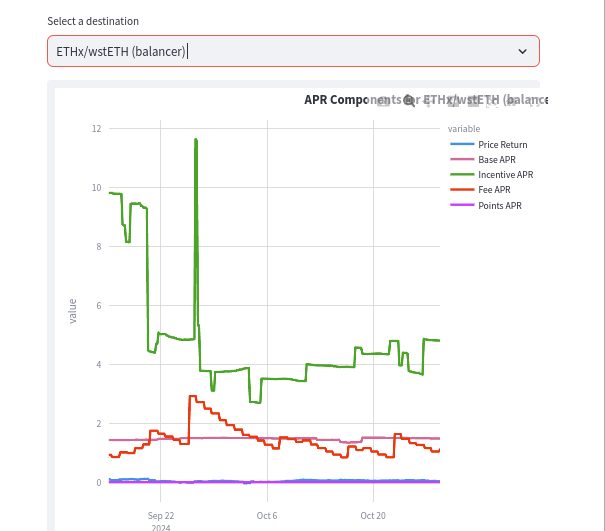

In [19]:
apr = (100 * (end["pool_vp"] - start["pool_vp"]) / start["pool_vp"]) / portion_of_a_year
# the pure rate of growth in virtual price is 2.9%
# this seems like it matches up with the fee + base, or close enoough
apr

2.935845682982876

In [20]:
# back of the napkin

pool_usd_tvl = 1_800_000  # estimate
pool_usd_fees = 2275
100 * pool_usd_fees * 12 / pool_usd_tvl

# this is tracking, the ETHx / wstETH pool has a 1 month estiamte fee apr of 1.5% and a 1 month total return of 2.9 % and expected base APR of 1.5%
# this is looking right https://balancer.fi/pools/ethereum/v2/0xb91159aa527d4769cb9faf3e4adb760c7e8c8ea700000000000000000000067c

1.5166666666666666

In [ ]:
build_get_virtual_price_call("vp", "0x59Ab5a5b5d617E478a2479B0cAD80DA7e2831492"),